In [1]:
import os
import matplotlib.pyplot as plt

# List the contents of the extracted dataset directory to confirm its structure
dataset_path =  '/content/drive/MyDrive/Colab Notebooks/AAI 521 Computer Vision - USD/Fengshui-AI Project/furniture detection.v20i.yolov8-obb' # Path to the extracted dataset
dataset_structure = os.listdir(dataset_path)

# Organize directories for train, validation, and test splits
train_dir = os.path.join(dataset_path, "train")
valid_dir = os.path.join(dataset_path, "valid")
test_dir = os.path.join(dataset_path, "test")

# Check subdirectories in train, valid, and test
train_contents = os.listdir(train_dir) if os.path.exists(train_dir) else []
valid_contents = os.listdir(valid_dir) if os.path.exists(valid_dir) else []
test_contents = os.listdir(test_dir) if os.path.exists(test_dir) else []

{
    "Dataset Structure": dataset_structure,
    "Train Subdirectories": train_contents,
    "Valid Subdirectories": valid_contents,
    "Test Subdirectories": test_contents,
}

{'Dataset Structure': ['README.dataset.txt',
  'README.roboflow.txt',
  'data.yaml',
  'export',
  'valid',
  'test',
  'train'],
 'Train Subdirectories': ['images', 'labels'],
 'Valid Subdirectories': ['images', 'labels'],
 'Test Subdirectories': ['labels', 'images']}

In [3]:
# Select a sample label file from the train/labels directory
train_labels_dir = os.path.join(train_dir, "labels")
sample_label_file = os.path.join(train_labels_dir, os.listdir(train_labels_dir)[0])

# Read and display the content of the sample label file
with open(sample_label_file, 'r') as file:
    sample_label_content = file.readlines()

sample_label_content
# Locate the corresponding image for the sample label file
sample_image_name = os.path.splitext(os.path.basename(sample_label_file))[0] + ".jpg"
sample_image_path = os.path.join(train_dir, "images", sample_image_name)

# Confirm the corresponding image exists
os.path.exists(sample_image_path)


True

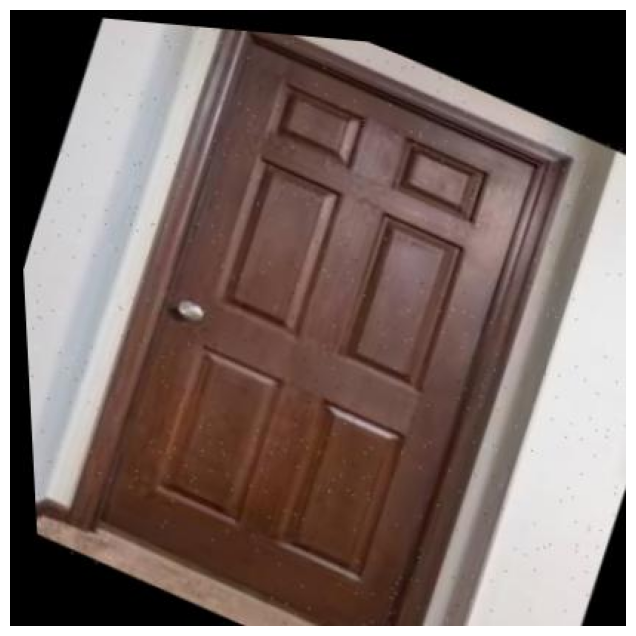

In [6]:
#  Dataset Exploration and Setup

import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Redefine dataset paths
dataset_path = '/content/drive/MyDrive/Colab Notebooks/AAI 521 Computer Vision - USD/Fengshui-AI Project/furniture detection.v20i.yolov8-obb'
train_dir = os.path.join(dataset_path, "train")
train_labels_dir = os.path.join(train_dir, "labels")
train_images_dir = os.path.join(train_dir, "images")

# Redefine class names based on data.yaml
class_names = {
    0: "Bed", 1: "Cabinet", 2: "Carpet", 3: "Ceramic floor", 4: "Chair",
    5: "Closet", 6: "Cupboard", 7: "Curtains", 8: "Dining Table", 9: "Door",
    10: "Frame", 11: "Futec frame", 12: "Futech tiles", 13: "Gypsum Board",
    14: "Lamp", 15: "Nightstand", 16: "Shelf", 17: "Sideboard", 18: "Sofa",
    19: "TV stand", 20: "Table", 21: "Transparent Closet", 22: "Wall Panel",
    23: "Window", 24: "Wooden floor"
}

# Select a sample label file and corresponding image file
sample_label_file = os.path.join(train_labels_dir, os.listdir(train_labels_dir)[0])
sample_image_file = os.path.join(train_images_dir, os.path.splitext(os.path.basename(sample_label_file))[0] + ".jpg")

# Redefine the visualization function
def visualize_oriented_bounding_boxes(image_path, label_path, class_names):
    """
    Visualize an image with oriented bounding boxes from the label file.
    """
    # Load image
    image = Image.open(image_path)
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(image)

    # Read label file
    with open(label_path, 'r') as f:
        labels = f.readlines()

    # Get image dimensions
    img_width, img_height = image.size

    # Plot each oriented bounding box
    for label in labels:
        label_data = label.strip().split()
        class_id = int(label_data[0])
        box_points = list(map(float, label_data[1:]))

        # Convert relative coordinates to absolute coordinates
        box_points_abs = [
            (box_points[i] * img_width, box_points[i + 1] * img_height)
            for i in range(0, len(box_points), 2)
        ]

        # Plot the bounding box as a polygon
        polygon = patches.Polygon(
            box_points_abs, closed=True, edgecolor='red', fill=False, linewidth=2
        )
        ax.add_patch(polygon)

        # Add the class label at the first point of the polygon
        ax.text(
            box_points_abs[0][0],
            box_points_abs[0][1] - 5,
            class_names[class_id],
            color='red',
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.6),
        )

    plt.axis('off')
    plt.show()

# Visualize the sample image with bounding boxes
visualize_oriented_bounding_boxes(sample_image_file, sample_label_file, class_names)

Dataset Summary:
Number of label files:
- Train: 6405
- Valid: 890
- Test: 739


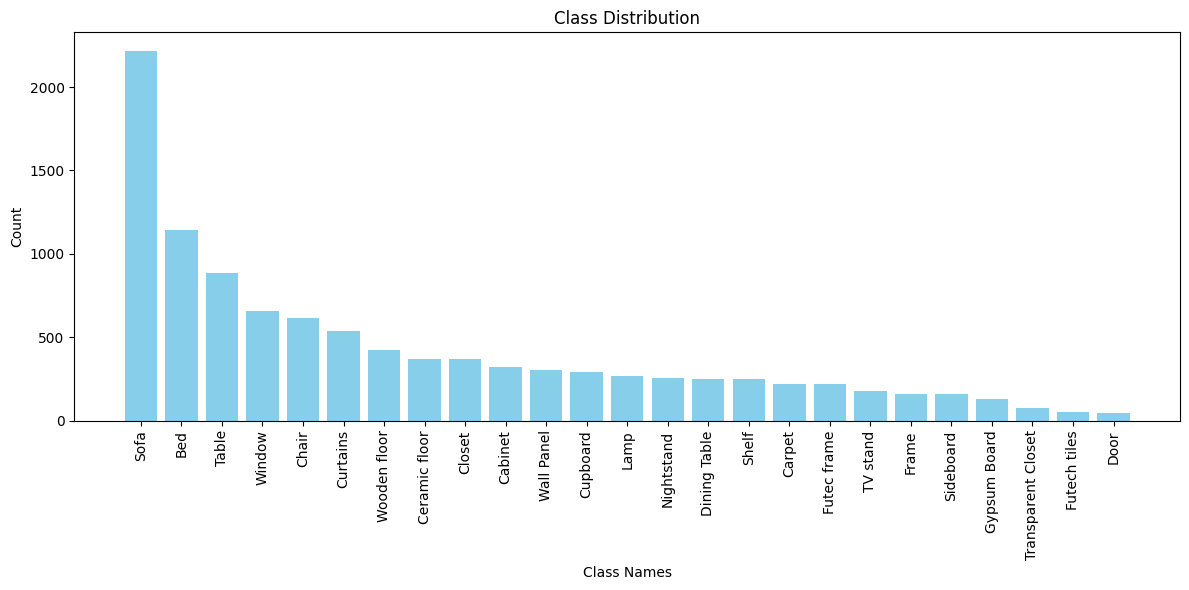

In [7]:
#  Exploratory Data Analysis
#  Dataset Summary and Class Distribution

import os
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Define dataset paths
dataset_path = '/content/drive/MyDrive/Colab Notebooks/AAI 521 Computer Vision - USD/Fengshui-AI Project/furniture detection.v20i.yolov8-obb'
train_dir = os.path.join(dataset_path, "train")
valid_dir = os.path.join(dataset_path, "valid")
test_dir = os.path.join(dataset_path, "test")

train_labels_dir = os.path.join(train_dir, "labels")
valid_labels_dir = os.path.join(valid_dir, "labels")
test_labels_dir = os.path.join(test_dir, "labels")

# Define class names (adjust based on your dataset's data.yaml file)
class_names = {
    0: "Bed", 1: "Cabinet", 2: "Carpet", 3: "Ceramic floor", 4: "Chair",
    5: "Closet", 6: "Cupboard", 7: "Curtains", 8: "Dining Table", 9: "Door",
    10: "Frame", 11: "Futec frame", 12: "Futech tiles", 13: "Gypsum Board",
    14: "Lamp", 15: "Nightstand", 16: "Shelf", 17: "Sideboard", 18: "Sofa",
    19: "TV stand", 20: "Table", 21: "Transparent Closet", 22: "Wall Panel",
    23: "Window", 24: "Wooden floor"
}

# Initialize counters for class distribution and dataset splits
class_counter = Counter()
split_counts = {"train": 0, "valid": 0, "test": 0}

# Helper function to count classes in a label file
def count_classes_in_label_file(label_file_path):
    with open(label_file_path, 'r') as file:
        labels = file.readlines()
    for label in labels:
        class_id = int(label.strip().split()[0])
        class_counter[class_id] += 1

# Count labels in the train split
if os.path.exists(train_labels_dir):
    split_counts["train"] = len(os.listdir(train_labels_dir))
    for label_file in os.listdir(train_labels_dir):
        count_classes_in_label_file(os.path.join(train_labels_dir, label_file))

# Count labels in the validation split
if os.path.exists(valid_labels_dir):
    split_counts["valid"] = len(os.listdir(valid_labels_dir))
    for label_file in os.listdir(valid_labels_dir):
        count_classes_in_label_file(os.path.join(valid_labels_dir, label_file))

# Count labels in the test split
if os.path.exists(test_labels_dir):
    split_counts["test"] = len(os.listdir(test_labels_dir))
    for label_file in os.listdir(test_labels_dir):
        count_classes_in_label_file(os.path.join(test_labels_dir, label_file))

# Convert class counts to a DataFrame
class_distribution = pd.DataFrame.from_dict(class_counter, orient="index", columns=["Count"])
class_distribution.index = class_distribution.index.map(class_names.get)
class_distribution = class_distribution.sort_values(by="Count", ascending=False)

# Display dataset summary
print("Dataset Summary:")
print(f"Number of label files:")
print(f"- Train: {split_counts['train']}")
print(f"- Valid: {split_counts['valid']}")
print(f"- Test: {split_counts['test']}")

# Plot class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_distribution.index, class_distribution["Count"], color="skyblue")
plt.xlabel("Class Names")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#  Exploratory Data Analysis
#  Bounding Box Statistics and Image Dimension

from PIL import Image  # Ensure Image is imported
import os
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store bounding box statistics
bbox_widths = []
bbox_heights = []
aspect_ratios = []

# Helper function to calculate bounding box statistics
def analyze_bounding_boxes(label_file_path, image_width, image_height):
    with open(label_file_path, 'r') as file:
        labels = file.readlines()
    for label in labels:
        data = list(map(float, label.strip().split()[1:]))
        # Convert relative coordinates to absolute pixel values
        points = [(data[i] * image_width, data[i + 1] * image_height) for i in range(0, len(data), 2)]
        # Calculate width, height, and aspect ratio
        width = np.abs(points[1][0] - points[0][0])
        height = np.abs(points[2][1] - points[1][1])
        bbox_widths.append(width)
        bbox_heights.append(height)
        aspect_ratios.append(width / height if height > 0 else 0)

# Analyze bounding boxes in the train split
if os.path.exists(train_labels_dir):
    for label_file in os.listdir(train_labels_dir):
        image_file = os.path.join(train_dir, "images", os.path.splitext(label_file)[0] + ".jpg")
        if os.path.exists(image_file):
            image = Image.open(image_file)
            image_width, image_height = image.size
            analyze_bounding_boxes(os.path.join(train_labels_dir, label_file), image_width, image_height)

# Create histograms for bounding box statistics
plt.figure(figsize=(12, 5))
plt.hist(bbox_widths, bins=50, alpha=0.7, label="Widths")
plt.hist(bbox_heights, bins=50, alpha=0.7, label="Heights")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.title("Bounding Box Width and Height Distribution")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.hist(aspect_ratios, bins=50, color="green", alpha=0.7)
plt.xlabel("Aspect Ratio (Width / Height)")
plt.ylabel("Frequency")
plt.title("Bounding Box Aspect Ratio Distribution")
plt.show()

In [8]:
#  Steps for Training the Model and Evaluate

from ultralytics import YOLO

# Load a YOLOv8 model (pre-trained weights)
model = YOLO('yolov8n.pt')  # You can also use 'yolov8s.pt' or other variants

# Train the model
model.train(
    data='/content/drive/MyDrive/Colab Notebooks/AAI 521 Computer Vision - USD/Fengshui-AI Project/furniture detection.v20i.yolov8-obb/data.yaml',
    epochs=50,         # Number of epochs to train
    batch=16,          # Batch size
    imgsz=416,         # Image size
    project='furniture_detection',  # Project folder for logs and weights
    name='yolov8_furniture',        # Experiment name
)

Ultralytics 8.3.32 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/AAI 521 Computer Vision - USD/Fengshui-AI Project/furniture detection.v20i.yolov8-obb/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=furniture_detection, name=yolov8_furniture5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, em

100%|██████████| 755k/755k [00:00<00:00, 132MB/s]


Overriding model.yaml nc=80 with nc=25

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 312MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Colab Notebooks/AAI 521 Computer Vision - USD/Fengshui-AI Project/furniture detection.v20i.yolov8-obb/train/labels... 6405 images, 378 backgrounds, 500 corrupt: 100%|██████████| 6414/6414 [13:53<00:00,  7.70it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/AAI 521 Computer Vision - USD/Fengshui-AI Project/furniture detection.v20i.yolov8-obb/train/images/0000000025791666176_png.rf.507f3115d7ce92faf01f4e7408977a3c.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0063]
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/AAI 521 Computer Vision - USD/Fengshui-AI Project/furniture detection.v20i.yolov8-obb/train/images/0000000026031667200_png.rf.6b5264bb12ed99084443d8b06537bed2.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0331      1.0894]
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/AAI 521 Computer Vision - USD/Fengshui-AI Project/furniture detection.v20i.yolov8-obb/train/images/0000000026111666176_png.rf.2ceb47f0336953220acc73795a302114.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.041]
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/AAI 

train: New cache created: /content/drive/MyDrive/Colab Notebooks/AAI 521 Computer Vision - USD/Fengshui-AI Project/furniture detection.v20i.yolov8-obb/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Colab Notebooks/AAI 521 Computer Vision - USD/Fengshui-AI Project/furniture detection.v20i.yolov8-obb/valid/labels... 890 images, 66 backgrounds, 17 corrupt: 100%|██████████| 890/890 [02:00<00:00,  7.38it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/AAI 521 Computer Vision - USD/Fengshui-AI Project/furniture detection.v20i.yolov8-obb/valid/images/00000177_jpg.rf.fd9f5a7bad445bcaff37c195a3b59c67.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1293       1.129]
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/AAI 521 Computer Vision - USD/Fengshui-AI Project/furniture detection.v20i.yolov8-obb/valid/images/111049_jpg.rf.c5b88700656be2d1faa07c4a559e97d8.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0415]
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/AAI 521 Computer Vision - USD/Fengshui-AI Project/furniture detection.v20i.yolov8-obb/valid/images/111262_jpg.rf.104b9ef1d0ebadc84af6912b01d11a9d.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0694      1.0082]
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/AAI 521 Computer Vision - USD/Fengshu

val: New cache created: /content/drive/MyDrive/Colab Notebooks/AAI 521 Computer Vision - USD/Fengshui-AI Project/furniture detection.v20i.yolov8-obb/valid/labels.cache
Plotting labels to furniture_detection/yolov8_furniture5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to furniture_detection/yolov8_furniture5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.07G      1.203      3.556      1.496         40        416: 100%|██████████| 370/370 [00:42<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  5.32it/s]

                   all        873        992      0.403       0.14      0.134     0.0821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.06G      1.132      2.591      1.472         42        416: 100%|██████████| 370/370 [00:39<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.29it/s]

                   all        873        992      0.508      0.233      0.231      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.03G      1.073      2.235      1.421         43        416: 100%|██████████| 370/370 [00:38<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.66it/s]

                   all        873        992      0.443      0.316      0.305      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.03G      1.042      2.072      1.387         42        416: 100%|██████████| 370/370 [00:37<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.76it/s]

                   all        873        992      0.501      0.357      0.347      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.04G      1.021      1.952      1.367         34        416: 100%|██████████| 370/370 [00:37<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.42it/s]

                   all        873        992      0.561      0.363      0.376      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.02G     0.9989      1.849      1.345         36        416: 100%|██████████| 370/370 [00:38<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.75it/s]

                   all        873        992      0.555      0.383      0.398      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.04G     0.9693      1.776      1.325         36        416: 100%|██████████| 370/370 [00:38<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.32it/s]

                   all        873        992      0.611      0.362      0.418      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.03G     0.9702       1.74      1.328         30        416: 100%|██████████| 370/370 [00:38<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.62it/s]

                   all        873        992      0.494      0.428      0.415      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.04G     0.9502      1.667      1.313         36        416: 100%|██████████| 370/370 [00:38<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.64it/s]

                   all        873        992      0.585      0.411      0.448      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.02G     0.9384      1.644      1.304         31        416: 100%|██████████| 370/370 [00:37<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.57it/s]

                   all        873        992      0.515       0.52       0.49      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.05G     0.9391      1.612      1.303         45        416: 100%|██████████| 370/370 [00:38<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.90it/s]

                   all        873        992      0.576      0.394       0.48      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.02G     0.9166      1.547      1.292         26        416: 100%|██████████| 370/370 [00:37<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.44it/s]

                   all        873        992      0.483      0.518      0.507      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.03G     0.9134       1.54      1.288         54        416: 100%|██████████| 370/370 [00:37<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:03<00:00,  7.01it/s]

                   all        873        992      0.578      0.445      0.513      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.02G     0.9065      1.492      1.285         45        416: 100%|██████████| 370/370 [00:38<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.53it/s]

                   all        873        992      0.477      0.539      0.521      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.04G     0.9003      1.466      1.278         35        416: 100%|██████████| 370/370 [00:37<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.77it/s]

                   all        873        992      0.549      0.511       0.53      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.02G     0.8875      1.435      1.271         37        416: 100%|██████████| 370/370 [00:37<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.75it/s]

                   all        873        992      0.547      0.524      0.545      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.03G     0.8814      1.413      1.271         36        416: 100%|██████████| 370/370 [00:37<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.51it/s]

                   all        873        992      0.513      0.523      0.525      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.03G     0.8737      1.403       1.26         38        416: 100%|██████████| 370/370 [00:37<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:03<00:00,  7.09it/s]

                   all        873        992      0.513      0.598      0.552      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.04G     0.8752      1.383      1.264         27        416: 100%|██████████| 370/370 [00:37<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.53it/s]

                   all        873        992      0.571      0.501      0.552       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.02G     0.8673      1.365      1.259         35        416: 100%|██████████| 370/370 [00:37<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:03<00:00,  7.07it/s]


                   all        873        992      0.587      0.516      0.559      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.06G     0.8624      1.352      1.257         34        416: 100%|██████████| 370/370 [00:37<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.65it/s]

                   all        873        992      0.514      0.597      0.563      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.02G     0.8533       1.34      1.249         34        416: 100%|██████████| 370/370 [00:37<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.93it/s]

                   all        873        992      0.591      0.511      0.553      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.04G     0.8407      1.304       1.24         39        416: 100%|██████████| 370/370 [00:36<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:03<00:00,  7.10it/s]

                   all        873        992       0.64      0.511      0.573      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.02G     0.8443      1.299      1.241         33        416: 100%|██████████| 370/370 [00:37<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.67it/s]

                   all        873        992      0.553      0.589       0.59      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.04G     0.8398      1.271      1.233         27        416: 100%|██████████| 370/370 [00:37<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.98it/s]


                   all        873        992       0.58      0.589      0.577       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.03G     0.8244      1.252      1.229         33        416: 100%|██████████| 370/370 [00:36<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.65it/s]

                   all        873        992      0.584      0.584      0.587      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.03G     0.8196      1.252      1.227         50        416: 100%|██████████| 370/370 [00:36<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:03<00:00,  7.16it/s]

                   all        873        992      0.581      0.531       0.59       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.03G     0.8181      1.244      1.228         37        416: 100%|██████████| 370/370 [00:36<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:03<00:00,  7.09it/s]

                   all        873        992      0.517      0.524      0.572      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.04G     0.8221      1.216      1.228         32        416: 100%|██████████| 370/370 [00:36<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:03<00:00,  7.02it/s]

                   all        873        992      0.618      0.526      0.593      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.02G     0.8103      1.222      1.221         32        416: 100%|██████████| 370/370 [00:36<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:03<00:00,  7.20it/s]

                   all        873        992      0.556       0.62      0.616      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.06G     0.8121      1.215      1.223         35        416: 100%|██████████| 370/370 [00:36<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.55it/s]

                   all        873        992       0.63      0.541      0.619      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.03G     0.7969      1.182      1.211         43        416: 100%|██████████| 370/370 [00:36<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.99it/s]

                   all        873        992       0.61       0.58      0.624        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.04G     0.8062      1.191       1.22         37        416: 100%|██████████| 370/370 [00:36<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.68it/s]

                   all        873        992      0.601      0.596      0.612      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.02G     0.7966      1.174      1.207         29        416: 100%|██████████| 370/370 [00:36<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:03<00:00,  7.14it/s]

                   all        873        992      0.571       0.59       0.61      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.04G     0.7929      1.167      1.209         43        416: 100%|██████████| 370/370 [00:37<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:03<00:00,  7.03it/s]

                   all        873        992      0.549      0.593      0.594      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.02G     0.7863      1.145      1.206         37        416: 100%|██████████| 370/370 [00:37<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.82it/s]

                   all        873        992       0.64      0.542      0.621        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.04G     0.7794      1.144        1.2         29        416: 100%|██████████| 370/370 [00:37<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.94it/s]

                   all        873        992      0.538      0.634      0.617      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.02G      0.771      1.112      1.195         33        416: 100%|██████████| 370/370 [00:36<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.77it/s]


                   all        873        992      0.526      0.602      0.605        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.05G     0.7754      1.109      1.193         32        416: 100%|██████████| 370/370 [00:36<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:03<00:00,  7.07it/s]

                   all        873        992      0.566      0.615      0.614      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.02G      0.767      1.112      1.193         37        416: 100%|██████████| 370/370 [00:37<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:03<00:00,  7.14it/s]

                   all        873        992      0.595      0.595      0.617      0.399


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.04G     0.7641      0.986      1.219         10        416: 100%|██████████| 370/370 [00:36<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:03<00:00,  7.04it/s]

                   all        873        992      0.569      0.648      0.636      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.02G      0.751      0.907      1.213         11        416: 100%|██████████| 370/370 [00:36<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:03<00:00,  7.07it/s]

                   all        873        992      0.555      0.651      0.638      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.04G     0.7359     0.8868      1.199          8        416: 100%|██████████| 370/370 [00:35<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:03<00:00,  7.05it/s]

                   all        873        992       0.58      0.617      0.632      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.01G     0.7252     0.8545      1.198          9        416: 100%|██████████| 370/370 [00:36<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.99it/s]

                   all        873        992      0.593      0.633       0.64      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.03G     0.7112     0.8393      1.183          7        416: 100%|██████████| 370/370 [00:35<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:03<00:00,  7.04it/s]


                   all        873        992      0.607      0.599      0.643      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.02G     0.7045      0.798      1.178         10        416: 100%|██████████| 370/370 [00:35<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.96it/s]

                   all        873        992      0.577      0.606      0.632      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.04G     0.6951     0.8039      1.173          9        416: 100%|██████████| 370/370 [00:35<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:03<00:00,  7.20it/s]

                   all        873        992      0.619      0.593      0.627      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.02G     0.6815     0.7776      1.158         14        416: 100%|██████████| 370/370 [00:36<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.85it/s]

                   all        873        992      0.611      0.589      0.632      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.04G     0.6816     0.7724      1.164         19        416: 100%|██████████| 370/370 [00:35<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:03<00:00,  7.23it/s]

                   all        873        992      0.584      0.626      0.629       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.02G      0.676     0.7618      1.151         11        416: 100%|██████████| 370/370 [00:35<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.62it/s]

                   all        873        992      0.604       0.62      0.628       0.41



50 epochs completed in 0.586 hours.
Optimizer stripped from furniture_detection/yolov8_furniture5/weights/last.pt, 6.2MB
Optimizer stripped from furniture_detection/yolov8_furniture5/weights/best.pt, 6.2MB

Validating furniture_detection/yolov8_furniture5/weights/best.pt...
Ultralytics 8.3.32 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,010,523 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.21it/s]


                   all        873        992      0.607      0.599      0.643      0.416
                   Bed         69         69      0.837      0.884      0.925      0.668
               Cabinet         46         55       0.62      0.618      0.633      0.391
                Carpet         12         14      0.138     0.0714     0.0435     0.0334
         Ceramic floor          5          7      0.119      0.143      0.211      0.109
                 Chair         66         76      0.769      0.745      0.831      0.542
                Closet         30         31      0.731      0.903      0.928      0.768
              Cupboard         22         23      0.661      0.762      0.775      0.594
              Curtains         18         21      0.609      0.429      0.503       0.35
          Dining Table         37         37      0.966      0.764      0.884        0.5
                  Door          8          9      0.256      0.116       0.44       0.17
                 Fram

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78726c6fe710>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,  


image 1/1 /content/drive/MyDrive/Colab Notebooks/AAI 521 Computer Vision - USD/Fengshui-AI Project/furniture detection.v20i.yolov8-obb/test/images/202-244-19_jpg.rf.79de8d0f51542d3a742f3dbafbd09074.jpg: 416x416 1 Sofa, 6.8ms
Speed: 0.9ms preprocess, 6.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict6


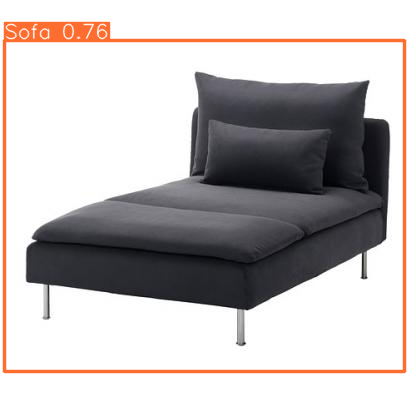

In [20]:
#  Make Predictions - Use the trained model to detect furniture in test images

# Load the trained model
model = YOLO('/content/furniture_detection/yolov8_furniture5/weights/best.pt')

# Predict on a test image
results = model.predict(source='/content/drive/MyDrive/Colab Notebooks/AAI 521 Computer Vision - USD/Fengshui-AI Project/furniture detection.v20i.yolov8-obb/test/images/202-244-19_jpg.rf.79de8d0f51542d3a742f3dbafbd09074.jpg', save=True)

# Visualize results
results[0].show()